In [281]:
import pandas as pd

# Ruta del archivo en el entorno de Colab
file_path = 'D://Facu/2024/2C/Aprendizaje Automatico/Trabajo final/deteccion_de_estacionalidad_en_crimen/data/external/Delitos.xlsx'  # Actualiza según tu caso

# Cargar el archivo Excel y la hoja "Tierra Del Fuego AeIAS"
excel_file = pd.ExcelFile(file_path)
df = excel_file.parse('Tierra Del Fuego AeIAS', skiprows=1)

# Imprimir las dimensiones del DataFrame
print(df.shape)

# Mostrar las primeras filas del DataFrame
df.head()

(37, 138)


,Unnamed: 0,ene,feb,mar,abr,may,jun,jul,ago,sept,oct,nov,dic,Unnamed: 13,ene.1,feb.1,mar.1,abr.1,may.1,jun.1,jul.1,ago.1,sept.1,oct.1,nov.1,dic.1,Unnamed: 26,ene.2,feb.2,mar.2,abr.2,may.2,jun.2,jul.2,ago.2,sept.2,oct.2,nov.2,dic.2,Unnamed: 39,ene.3,feb.3,mar.3,abr.3,may.3,jun.3,jul.3,ago.3,sept.3,oct.3,nov.3,dic.3,Unnamed: 52,ene.4,feb.4,mar.4,abr.4,may.4,jun.4,jul.4,ago.4,sept.4,oct.4,nov.4,dic.4,Unnamed: 65,ene.5,feb.5,mar.5,abr.5,may.5,jun.5,jul.5,ago.5,sept.5,oct.5,nov.5,dic.5,Unnamed: 78,ene.6,feb.6,mar.6,abr.6,may.6,jun.6,jul.6,ago.6,sept.6,oct.6,nov.6,dic.6,Unnamed: 91,ene.7,feb.7,mar.7,abr.7,may.7,jun.7,jul.7,ago.7,sept.7,oct.7,nov.7,dic.7,Unnamed: 104,ene.8,feb.8,mar.8,abr.8,may.8,jun.8,jul.8,ago.8,sept.8,oct.8,nov.8,dic.8,Unnamed: 117,ene.9,feb.9,mar.9,abr.9,may.9,jun.9,jul.9,ago.9,sept.9,oct.9,nov.9,dic.9,Unnamed: 130,ene.10,feb.10,mar.10,abr.10,may.10,jun.10,jul.10
0,Contra las Personas,60,67,108,115,94,95,115,116,105,125,132,131,NaN,80,111,117,143,114,105,98,98,115,110,98,98,NaN,85,86,142,133,115,129,95,110,134,136,142,136,NaN,144,129,156,131,136,140,125,119,214,228,144,188,NaN,122,170,184,214,147,223,159,229,140,192,228,237,NaN,178,178,193,145,207,205,143,200,170,170,216,209,NaN,219,201,168,98,117,157,159,157,104,138,129,157,NaN,148,183,203,183,165,222,188,177,178,208,189,202,NaN,186,151,192,177,195,163,134,201,186,175,167,182,NaN,213,194,229,132,197,166,151,180,205,175,179,177,NaN,213,181,239,220,247,176,187
1,Homicidios Dolosos,1,1,1,0,0,0,1,1,0,0,1,0,NaN,1,0,0,1,0,0,0,0,0,0,1,0,NaN,1,0,1,0,0,0,1,0,0,0,0,0,NaN,0,0,0,1,0,0,0,0,0,0,0,0,NaN,1,0,0,0,0,1,0,0,0,0,0,2,NaN,1,1,0,0,1,0,0,0,1,1,0,1,NaN,0,0,0,0,0,0,1,0,0,0,0,0,NaN,0,0,0,0,1,0,0,0,0,0,1,1,NaN,0,1,0,0,0,0,1,0,0,1,0,1,NaN,-,-,-,-,-,-,-,-,-,-,-,-,NaN,-,-,-,-,-,-,-
2,Homicidios dolosos en grado de tentativa,0,0,1,0,0,0,0,0,1,1,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,1,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,1,1,1,1,0,2,NaN,0,1,2,1,0,0,0,1,0,0,0,0,NaN,1,1,1,0,0,0,0,0,2,0,3,1,NaN,0,0,0,0,1,0,0,1,0,0,0,0,NaN,2,1,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,1,0,0,0,0,0,0,NaN,1,-,-,-,-,-,-,-,-,-,-,-,NaN,1,-,-,-,-,1,1
3,Homicidios Culposos e Accidentes de Tránsito,0,0,3,0,0,0,1,0,1,0,0,0,NaN,1,0,0,1,0,0,0,0,0,2,1,0,NaN,1,0,2,1,0,0,0,1,1,1,1,0,NaN,1,1,0,0,0,0,1,2,1,0,0,1,NaN,2,3,0,1,0,1,0,0,0,0,1,0,NaN,0,0,0,2,2,0,1,0,1,0,0,0,NaN,2,0,1,0,0,0,0,0,1,0,0,2,NaN,2,0,0,1,0,0,0,0,1,2,0,0,NaN,2,0,0,0,1,0,0,0,0,0,0,0,NaN,-,-,-,-,-,-,-,-,-,-,-,-,NaN,-,-,-,-,-,-,-
4,Homicidios culposos por otros hechos,0,0,0,0,0,0,0,0,0,0,1,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,NaN,0,0,0,1,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,-,-,1,-,-,-,-,-,-,-,-,-,NaN,-,-,-,-,-,-,-


In [282]:
import pandas as pd
from IPython.display import display  # Para una mejor visualización en Jupyter

# Ruta del archivo Excel en tu sistema
file_path = 'D://Facu/2024/2C/Aprendizaje Automatico/Trabajo final/deteccion_de_estacionalidad_en_crimen/data/external/Delitos.xlsx'

# Cargar el archivo Excel y la hoja "Tierra Del Fuego AeIAS"
excel_file = pd.ExcelFile(file_path)
df = excel_file.parse('Tierra Del Fuego AeIAS', skiprows=1)

# Asignar manualmente el nombre de la primera columna como "Tipo de Delito"
df.columns.values[0] = "Tipo de Delito"

# Eliminar todas las columnas completamente vacías al principio
df = df.dropna(axis=1, how='all')

# Convertir la columna "Tipo de Delito" a texto y el resto a numérico
df["Tipo de Delito"] = df["Tipo de Delito"].astype(str)
df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

# Generar los nombres de columnas para el período esperado (de 2014 a 2024 con 6 meses de 2024)
base_months = ['ene', 'feb', 'mar', 'abr', 'may', 'jun', 'jul', 'ago', 'sept', 'oct', 'nov', 'dic']
expected_columns = ['Tipo de Delito'] + \
                   [f"{month}_{year}" for year in range(2014, 2024) for month in base_months] + \
                   [f"{month}_2024" for month in base_months[:6]]

# Truncar el DataFrame para igualar el número de columnas esperadas y asignar nombres
df = df.iloc[:, :len(expected_columns)]
df.columns = expected_columns[:df.shape[1]]  # Solo asigna columnas que tengan datos

# Configuración para ver todas las columnas en Jupyter Notebook sin truncamiento
pd.set_option('display.max_columns', None)

# Mostrar el DataFrame limpio y corregido
display(df)


,Tipo de Delito,ene_2014,feb_2014,mar_2014,abr_2014,may_2014,jun_2014,jul_2014,ago_2014,sept_2014,oct_2014,nov_2014,dic_2014,ene_2015,feb_2015,mar_2015,abr_2015,may_2015,jun_2015,jul_2015,ago_2015,sept_2015,oct_2015,nov_2015,dic_2015,ene_2016,feb_2016,mar_2016,abr_2016,may_2016,jun_2016,jul_2016,ago_2016,sept_2016,oct_2016,nov_2016,dic_2016,ene_2017,feb_2017,mar_2017,abr_2017,may_2017,jun_2017,jul_2017,ago_2017,sept_2017,oct_2017,nov_2017,dic_2017,ene_2018,feb_2018,mar_2018,abr_2018,may_2018,jun_2018,jul_2018,ago_2018,sept_2018,oct_2018,nov_2018,dic_2018,ene_2019,feb_2019,mar_2019,abr_2019,may_2019,jun_2019,jul_2019,ago_2019,sept_2019,oct_2019,nov_2019,dic_2019,ene_2020,feb_2020,mar_2020,abr_2020,may_2020,jun_2020,jul_2020,ago_2020,sept_2020,oct_2020,nov_2020,dic_2020,ene_2021,feb_2021,mar_2021,abr_2021,may_2021,jun_2021,jul_2021,ago_2021,sept_2021,oct_2021,nov_2021,dic_2021,ene_2022,feb_2022,mar_2022,abr_2022,may_2022,jun_2022,jul_2022,ago_2022,sept_2022,oct_2022,nov_2022,dic_2022,ene_2023,feb_2023,mar_2023,abr_2023,may_2023,jun_2023,jul_2023,ago_2023,sept_2023,oct_2023,nov_2023,dic_2023,ene_2024,feb_2024,mar_2024,abr_2024,may_2024,jun_2024
0,Contra las Personas,60,67,108,115,94,95,115,116,105,125,132,131,80,111,117,143,114,105,98,98,115,110,98,98,85,86,142,133,115,129,95,110,134,136,142,136,144,129,156,131,136,140,125,119,214,228,144,188,122,170,184,214,147,223,159,229,140,192,228,237,178,178,193,145,207,205,143,200,170,170,216,209,219,201,168,98,117,157,159,157,104,138,129,157,148,183,203,183,165,222,188,177,178,208,189,202,186,151,192,177,195,163,134,201,186,175,167,182,213,194,229,132,197,166,151,180,205,175,179,177,213,181,239,220,247,176
1,Homicidios Dolosos,1,1,1,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2,1,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Homicidios dolosos en grado de tentativa,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,2,0,1,2,1,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,2,0,3,1,0,0,0,0,1,0,0,1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,Homicidios Culposos e Accidentes de Tránsito,0,0,3,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,2,1,0,1,0,2,1,0,0,0,1,1,1,1,0,1,1,0,0,0,0,1,2,1,0,0,1,2,3,0,1,0,1,0,0,0,0,1,0,0,0,0,2,2,0,1,0,1,0,0,0,2,0,1,0,0,0,0,0,1,0,0,2,2,0,0,1,0,0,0,0,1,2,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Homicidios culposos por otros hechos,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Lesiones dolosas,51,46,75,54,60,71,82,63,67,86,69,57,47,59,81,81,71,56,40,35,63,45,44,58,44,37,53,50,55,66,39,30,59,53,49,52,48,45,52,67,54,52,63,45,31,40,55,53,41,37,54,63,59,69,63,83,50,58,91,65,50,50,61,57,56,91,61,59,50,54,52,50,75,69,64,35,36,62,70,60,42,45,38,52,70,50,80,70,59,43,64,58,78,73,73,74,68,56,63,62,63,65,31,79,78,78,64,60,54,62,74,51,67,70,53,71,76,61,62,49,54,66,83,82,89,65
6,Lesiones culposas en accidentes de tránsito,0,0,8,19,16,8,13,13,6,4,13,11,9,8,12,10,18,8,7,10,10,10,11,13,6,9,12,17,12,4,11,12,15,19,19,15,25,15,21,13,11,20,13,11,15,36,9,14,9,11,12,37,13,11,3,10,13,20,16,19,14,14,13,4,25,9,16,19,2,9,8,8,13,15,4,1,2,3,8,4,4,3,2,9,8,10,3,15,10,23,9,4,8,7,20,11,10,4,13,15,20,12,21,21,7,6,13,7,9,11,4,8,10,13,17,7,10,3,14,7,9,11,27,18,15,4
7,Lesiones culposas por otros hechos,6,14,17,0,0,0,1,0,2,2,0,0,0,0,0,0,0,2,0,0,0,7,0,0,1,0,0,0,1,1,0,1,14,3,0,0,8,16,7,0,7,3,0,0,20,17,0,21,0,12,0,0,0,0,0,0,0,4,0,0,1,1,0,4,0,0,0,0,8,0,12,1,1,0,0,0,0,0,0,0,1,0,3,0,1,0,0,0,0,1,1,1,0,1,3,3,0,0,0,0,2,1,0,7,0,0,1,1,3,0,4,2,1,0,0,0,0,0,0,0,3,0,0,0,1,0
8,Otros delitos contra las personas,2,6,3,42,18,16,17,39,28,32,48,63,22,44,24,50,25,39,51,53,42,46,4

In [283]:
# Crear un diccionario para almacenar las categorías y subcategorías dinámicamente
categorias_dict = {}
categoria_actual = None

# Iterar sobre las filas del DataFrame original
for _, row in df.iterrows():
    tipo_delito = row["Tipo de Delito"]
    
    # Identificar si es una categoría principal o una subcategoría
    if tipo_delito in ["Contra las Personas", "Otros Delitos Contra las Personas", "Contra la Propiedad", "Total Hechos delictuosos"]:
        # Nueva categoría principal
        categoria_actual = tipo_delito
        categorias_dict[categoria_actual] = []  # Inicializar lista de subcategorías
    else:
        # Es una subcategoría, agregarla a la categoría actual
        if categoria_actual:
            categorias_dict[categoria_actual].append(tipo_delito)

# Crear el DataFrame final ordenado
final_data = []

# Rellenar el DataFrame respetando el orden jerárquico del diccionario
for categoria, subcategorias in categorias_dict.items():
    # Agregar la categoría principal
    categoria_row = df[df["Tipo de Delito"] == categoria]
    if not categoria_row.empty:
        final_data.extend(categoria_row.to_dict("records"))
    
    # Agregar las subcategorías
    for subcategoria in subcategorias:
        subcategoria_row = df[df["Tipo de Delito"] == subcategoria]
        if not subcategoria_row.empty:
            final_data.extend(subcategoria_row.to_dict("records"))

# Crear un DataFrame a partir de los datos ordenados
final_df = pd.DataFrame(final_data)

# Configuración para mostrar todas las filas y columnas completas
pd.set_option("display.max_columns", None)  # Mostrar todas las columnas
pd.set_option("display.max_rows", None)     # Mostrar todas las filas

# Mostrar el DataFrame final organizado
display(final_df)

,Tipo de Delito,ene_2014,feb_2014,mar_2014,abr_2014,may_2014,jun_2014,jul_2014,ago_2014,sept_2014,oct_2014,nov_2014,dic_2014,ene_2015,feb_2015,mar_2015,abr_2015,may_2015,jun_2015,jul_2015,ago_2015,sept_2015,oct_2015,nov_2015,dic_2015,ene_2016,feb_2016,mar_2016,abr_2016,may_2016,jun_2016,jul_2016,ago_2016,sept_2016,oct_2016,nov_2016,dic_2016,ene_2017,feb_2017,mar_2017,abr_2017,may_2017,jun_2017,jul_2017,ago_2017,sept_2017,oct_2017,nov_2017,dic_2017,ene_2018,feb_2018,mar_2018,abr_2018,may_2018,jun_2018,jul_2018,ago_2018,sept_2018,oct_2018,nov_2018,dic_2018,ene_2019,feb_2019,mar_2019,abr_2019,may_2019,jun_2019,jul_2019,ago_2019,sept_2019,oct_2019,nov_2019,dic_2019,ene_2020,feb_2020,mar_2020,abr_2020,may_2020,jun_2020,jul_2020,ago_2020,sept_2020,oct_2020,nov_2020,dic_2020,ene_2021,feb_2021,mar_2021,abr_2021,may_2021,jun_2021,jul_2021,ago_2021,sept_2021,oct_2021,nov_2021,dic_2021,ene_2022,feb_2022,mar_2022,abr_2022,may_2022,jun_2022,jul_2022,ago_2022,sept_2022,oct_2022,nov_2022,dic_2022,ene_2023,feb_2023,mar_2023,abr_2023,may_2023,jun_2023,jul_2023,ago_2023,sept_2023,oct_2023,nov_2023,dic_2023,ene_2024,feb_2024,mar_2024,abr_2024,may_2024,jun_2024
0,Contra las Personas,60,67,108,115,94,95,115,116,105,125,132,131,80,111,117,143,114,105,98,98,115,110,98,98,85,86,142,133,115,129,95,110,134,136,142,136,144,129,156,131,136,140,125,119,214,228,144,188,122,170,184,214,147,223,159,229,140,192,228,237,178,178,193,145,207,205,143,200,170,170,216,209,219,201,168,98,117,157,159,157,104,138,129,157,148,183,203,183,165,222,188,177,178,208,189,202,186,151,192,177,195,163,134,201,186,175,167,182,213,194,229,132,197,166,151,180,205,175,179,177,213,181,239,220,247,176
1,Homicidios Dolosos,1,1,1,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2,1,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Homicidios dolosos en grado de tentativa,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,2,0,1,2,1,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,2,0,3,1,0,0,0,0,1,0,0,1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,Homicidios Culposos e Accidentes de Tránsito,0,0,3,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,2,1,0,1,0,2,1,0,0,0,1,1,1,1,0,1,1,0,0,0,0,1,2,1,0,0,1,2,3,0,1,0,1,0,0,0,0,1,0,0,0,0,2,2,0,1,0,1,0,0,0,2,0,1,0,0,0,0,0,1,0,0,2,2,0,0,1,0,0,0,0,1,2,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Homicidios culposos por otros hechos,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Lesiones dolosas,51,46,75,54,60,71,82,63,67,86,69,57,47,59,81,81,71,56,40,35,63,45,44,58,44,37,53,50,55,66,39,30,59,53,49,52,48,45,52,67,54,52,63,45,31,40,55,53,41,37,54,63,59,69,63,83,50,58,91,65,50,50,61,57,56,91,61,59,50,54,52,50,75,69,64,35,36,62,70,60,42,45,38,52,70,50,80,70,59,43,64,58,78,73,73,74,68,56,63,62,63,65,31,79,78,78,64,60,54,62,74,51,67,70,53,71,76,61,62,49,54,66,83,82,89,65
6,Lesiones culposas en accidentes de tránsito,0,0,8,19,16,8,13,13,6,4,13,11,9,8,12,10,18,8,7,10,10,10,11,13,6,9,12,17,12,4,11,12,15,19,19,15,25,15,21,13,11,20,13,11,15,36,9,14,9,11,12,37,13,11,3,10,13,20,16,19,14,14,13,4,25,9,16,19,2,9,8,8,13,15,4,1,2,3,8,4,4,3,2,9,8,10,3,15,10,23,9,4,8,7,20,11,10,4,13,15,20,12,21,21,7,6,13,7,9,11,4,8,10,13,17,7,10,3,14,7,9,11,27,18,15,4
7,Lesiones culposas por otros hechos,6,14,17,0,0,0,1,0,2,2,0,0,0,0,0,0,0,2,0,0,0,7,0,0,1,0,0,0,1,1,0,1,14,3,0,0,8,16,7,0,7,3,0,0,20,17,0,21,0,12,0,0,0,0,0,0,0,4,0,0,1,1,0,4,0,0,0,0,8,0,12,1,1,0,0,0,0,0,0,0,1,0,3,0,1,0,0,0,0,1,1,1,0,1,3,3,0,0,0,0,2,1,0,7,0,0,1,1,3,0,4,2,1,0,0,0,0,0,0,0,3,0,0,0,1,0
8,Otros delitos contra las personas,2,6,3,42,18,16,17,39,28,32,48,63,22,44,24,50,25,39,51,53,42,46,4

In [284]:
# Identificar las filas que contienen "Otros Delitos Contra las Personas"
otros_delitos_mask = df["Tipo de Delito"] == "Otros Delitos Contra las Personas"

# Sumar los valores de las columnas numéricas para las filas duplicadas
otros_delitos_sum = df[otros_delitos_mask].iloc[:, 1:].sum()

# Crear una fila consolidada con el nombre y los valores sumados
otros_delitos_consolidado = pd.DataFrame(
    [["Otros Delitos Contra las Personas"] + otros_delitos_sum.tolist()],
    columns=df.columns
)

# Obtener la posición original más baja de las filas duplicadas
posicion_original = df.index[otros_delitos_mask].min()

# Eliminar todas las filas duplicadas de "Otros Delitos Contra las Personas"
df = df[~otros_delitos_mask]

# Dividir el DataFrame en dos partes: antes y después de la posición original
df_parte1 = df.iloc[:posicion_original]
df_parte2 = df.iloc[posicion_original:]

# Reconstruir el DataFrame con la fila consolidada en la posición correcta
df = pd.concat([df_parte1, otros_delitos_consolidado, df_parte2], ignore_index=True)

# Mostrar el DataFrame actualizado
display(df)


,Tipo de Delito,ene_2014,feb_2014,mar_2014,abr_2014,may_2014,jun_2014,jul_2014,ago_2014,sept_2014,oct_2014,nov_2014,dic_2014,ene_2015,feb_2015,mar_2015,abr_2015,may_2015,jun_2015,jul_2015,ago_2015,sept_2015,oct_2015,nov_2015,dic_2015,ene_2016,feb_2016,mar_2016,abr_2016,may_2016,jun_2016,jul_2016,ago_2016,sept_2016,oct_2016,nov_2016,dic_2016,ene_2017,feb_2017,mar_2017,abr_2017,may_2017,jun_2017,jul_2017,ago_2017,sept_2017,oct_2017,nov_2017,dic_2017,ene_2018,feb_2018,mar_2018,abr_2018,may_2018,jun_2018,jul_2018,ago_2018,sept_2018,oct_2018,nov_2018,dic_2018,ene_2019,feb_2019,mar_2019,abr_2019,may_2019,jun_2019,jul_2019,ago_2019,sept_2019,oct_2019,nov_2019,dic_2019,ene_2020,feb_2020,mar_2020,abr_2020,may_2020,jun_2020,jul_2020,ago_2020,sept_2020,oct_2020,nov_2020,dic_2020,ene_2021,feb_2021,mar_2021,abr_2021,may_2021,jun_2021,jul_2021,ago_2021,sept_2021,oct_2021,nov_2021,dic_2021,ene_2022,feb_2022,mar_2022,abr_2022,may_2022,jun_2022,jul_2022,ago_2022,sept_2022,oct_2022,nov_2022,dic_2022,ene_2023,feb_2023,mar_2023,abr_2023,may_2023,jun_2023,jul_2023,ago_2023,sept_2023,oct_2023,nov_2023,dic_2023,ene_2024,feb_2024,mar_2024,abr_2024,may_2024,jun_2024
0,Contra las Personas,60,67,108,115,94,95,115,116,105,125,132,131,80,111,117,143,114,105,98,98,115,110,98,98,85,86,142,133,115,129,95,110,134,136,142,136,144,129,156,131,136,140,125,119,214,228,144,188,122,170,184,214,147,223,159,229,140,192,228,237,178,178,193,145,207,205,143,200,170,170,216,209,219,201,168,98,117,157,159,157,104,138,129,157,148,183,203,183,165,222,188,177,178,208,189,202,186,151,192,177,195,163,134,201,186,175,167,182,213,194,229,132,197,166,151,180,205,175,179,177,213,181,239,220,247,176
1,Homicidios Dolosos,1,1,1,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2,1,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Homicidios dolosos en grado de tentativa,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,2,0,1,2,1,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,2,0,3,1,0,0,0,0,1,0,0,1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,Homicidios Culposos e Accidentes de Tránsito,0,0,3,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,2,1,0,1,0,2,1,0,0,0,1,1,1,1,0,1,1,0,0,0,0,1,2,1,0,0,1,2,3,0,1,0,1,0,0,0,0,1,0,0,0,0,2,2,0,1,0,1,0,0,0,2,0,1,0,0,0,0,0,1,0,0,2,2,0,0,1,0,0,0,0,1,2,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Homicidios culposos por otros hechos,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Lesiones dolosas,51,46,75,54,60,71,82,63,67,86,69,57,47,59,81,81,71,56,40,35,63,45,44,58,44,37,53,50,55,66,39,30,59,53,49,52,48,45,52,67,54,52,63,45,31,40,55,53,41,37,54,63,59,69,63,83,50,58,91,65,50,50,61,57,56,91,61,59,50,54,52,50,75,69,64,35,36,62,70,60,42,45,38,52,70,50,80,70,59,43,64,58,78,73,73,74,68,56,63,62,63,65,31,79,78,78,64,60,54,62,74,51,67,70,53,71,76,61,62,49,54,66,83,82,89,65
6,Lesiones culposas en accidentes de tránsito,0,0,8,19,16,8,13,13,6,4,13,11,9,8,12,10,18,8,7,10,10,10,11,13,6,9,12,17,12,4,11,12,15,19,19,15,25,15,21,13,11,20,13,11,15,36,9,14,9,11,12,37,13,11,3,10,13,20,16,19,14,14,13,4,25,9,16,19,2,9,8,8,13,15,4,1,2,3,8,4,4,3,2,9,8,10,3,15,10,23,9,4,8,7,20,11,10,4,13,15,20,12,21,21,7,6,13,7,9,11,4,8,10,13,17,7,10,3,14,7,9,11,27,18,15,4
7,Lesiones culposas por otros hechos,6,14,17,0,0,0,1,0,2,2,0,0,0,0,0,0,0,2,0,0,0,7,0,0,1,0,0,0,1,1,0,1,14,3,0,0,8,16,7,0,7,3,0,0,20,17,0,21,0,12,0,0,0,0,0,0,0,4,0,0,1,1,0,4,0,0,0,0,8,0,12,1,1,0,0,0,0,0,0,0,1,0,3,0,1,0,0,0,0,1,1,1,0,1,3,3,0,0,0,0,2,1,0,7,0,0,1,1,3,0,4,2,1,0,0,0,0,0,0,0,3,0,0,0,1,0
8,Otros delitos contra las personas,2,6,3,42,18,16,17,39,28,32,48,63,22,44,24,50,25,39,51,53,42,46,4

In [285]:
# Obtener la carpeta del archivo original
output_dir = os.path.dirname(input_file_path)

# Especificar la ruta para guardar el archivo corregido
output_file_path = os.path.join(output_dir, "delitos_correjido.xlsx")

# Guardar el DataFrame en un archivo Excel
df.to_excel(output_file_path, index=False)

# Confirmar que el archivo ha sido guardado
print(f"El archivo corregido ha sido guardado como: {output_file_path}")


El archivo corregido ha sido guardado como: D://Facu/2024/2C/Aprendizaje Automatico/Trabajo final/deteccion_de_estacionalidad_en_crimen/data/external\delitos_correjido.xlsx


In [286]:
import pandas as pd

# Ruta del archivo corregido
file_path = 'D://Facu/2024/2C/Aprendizaje Automatico/Trabajo final/deteccion_de_estacionalidad_en_crimen/data/external/delitos_correjido.xlsx'

# Cargar el archivo Excel
df = pd.read_excel(file_path)

# Mostrar las primeras filas para confirmar la carga
print("Primeras filas del dataset:")
print(df.head())

# Mostrar las columnas para verificar la estructura del dataset
print("\nColumnas del dataset:")
print(df.columns)


Primeras filas del dataset:
                                    Tipo de Delito  ene_2014  feb_2014  \
0                              Contra las Personas        60        67   
1                               Homicidios Dolosos         1         1   
2         Homicidios dolosos en grado de tentativa         0         0   
3     Homicidios Culposos e Accidentes de Tránsito         0         0   
4             Homicidios culposos por otros hechos         0         0   

   mar_2014  abr_2014  may_2014  jun_2014  jul_2014  ago_2014  sept_2014  \
0       108       115        94        95       115       116        105   
1         1         0         0         0         1         1          0   
2         1         0         0         0         0         0          1   
3         3         0         0         0         1         0          1   
4         0         0         0         0         0         0          0   

   oct_2014  nov_2014  dic_2014  ene_2015  feb_2015  mar_2015  abr_201

In [291]:
# Convertir la columna 'mes_año' a datetime utilizando el formato adecuado '%m_%Y'
df_melted['fecha'] = pd.to_datetime(df_melted['mes_año'], format='%m_%Y')

# Ahora tenemos una columna de fecha, tipo de delito, y cantidad
print(df_melted.head())



                                    Tipo de Delito  mes_año  cantidad  \
0                              Contra las Personas  01_2014        60   
1                               Homicidios Dolosos  01_2014         1   
2         Homicidios dolosos en grado de tentativa  01_2014         0   
3     Homicidios Culposos e Accidentes de Tránsito  01_2014         0   
4             Homicidios culposos por otros hechos  01_2014         0   

       fecha  
0 2014-01-01  
1 2014-01-01  
2 2014-01-01  
3 2014-01-01  
4 2014-01-01  


In [293]:
# Agrupar los datos: Agrupa los datos por 'fecha' para tener una visión mensual de los delitos y facilitar el análisis de estacionalidad.

# Agrupar los datos por 'fecha' y sumar la cantidad de delitos
delitos_mensuales = df_melted.groupby('fecha')['cantidad'].sum()

# Mostrar los primeros registros
print(delitos_mensuales.head())


fecha
2014-01-01    1052
2014-02-01    1115
2014-03-01    1818
2014-04-01    1737
2014-05-01    1674
Name: cantidad, dtype: int64


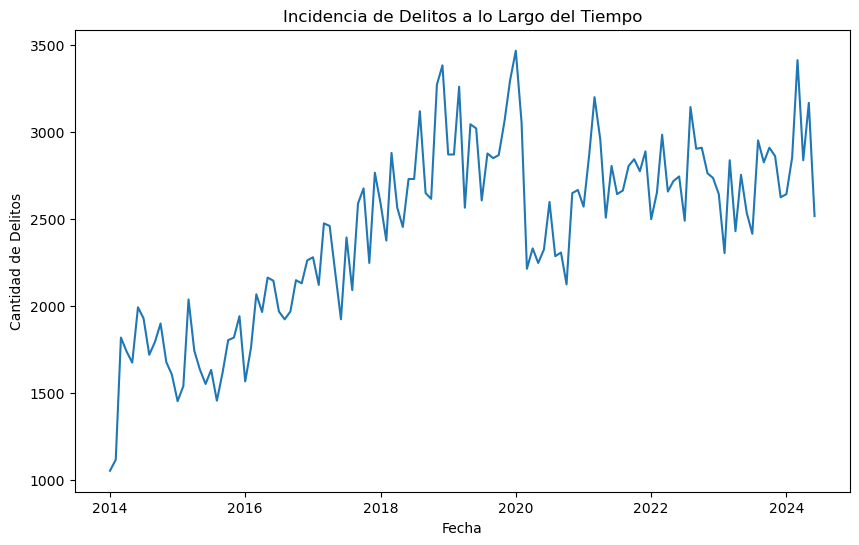

In [295]:
#Visualizar los datos: Realiza una gráfica para visualizar cómo cambian los delitos en el tiempo y detectar patrones estacionales.

import matplotlib.pyplot as plt

# Graficar la serie temporal
plt.figure(figsize=(10, 6))
plt.plot(delitos_mensuales.index, delitos_mensuales.values)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Delitos')
plt.title('Incidencia de Delitos a lo Largo del Tiempo')
plt.show()


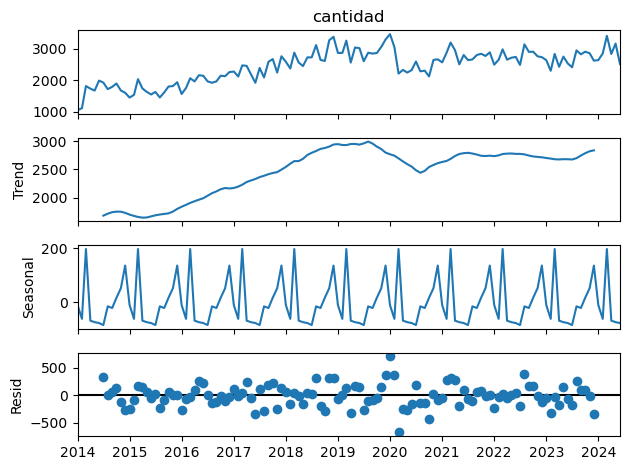

In [297]:
#Análisis de Estacionalidad: Para detectar patrones estacionales, puedes descomponer la serie temporal utilizando la librería statsmodels. Esto ayudará a identificar la tendencia, la estacionalidad y el componente aleatorio de los datos.

from statsmodels.tsa.seasonal import seasonal_decompose

# Descomponer la serie temporal
descomposicion = seasonal_decompose(delitos_mensuales, model='additive', period=12)
descomposicion.plot()
plt.show()

                                     SARIMAX Results                                      
Dep. Variable:                           cantidad   No. Observations:                  126
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -797.313
Date:                           lu., 18 nov. 2024   AIC                           1604.626
Time:                                    23:18:33   BIC                           1618.263
Sample:                                01-01-2014   HQIC                          1610.160
                                     - 06-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3255      0.160      2.030      0.042       0.011       0.640
ma.L1         -0.7935      0.105   

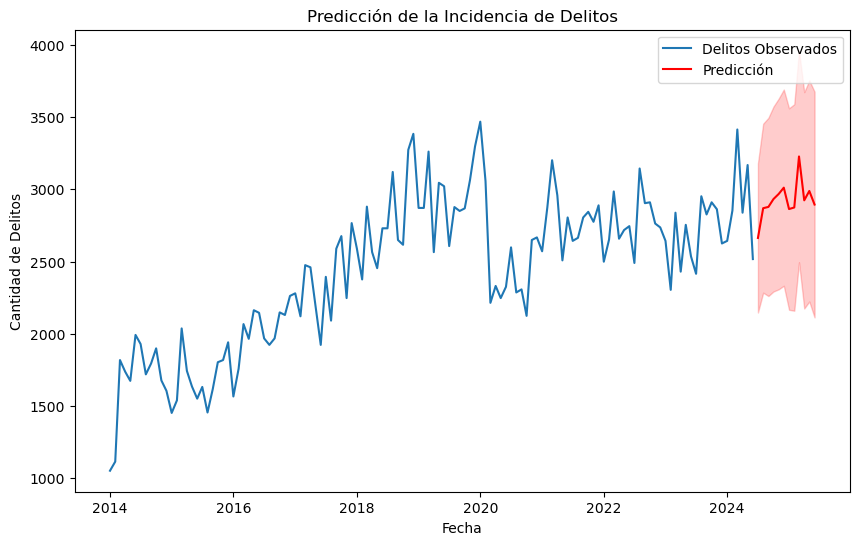

In [303]:
# Modelo de predicción: Una vez identificada la estacionalidad, puedes construir un modelo predictivo (por ejemplo, SARIMA) para 
# predecir la incidencia delictiva y planificar los recursos de seguridad.

# Establecer la frecuencia de la serie temporal a 'MS' (inicio de mes)
delitos_mensuales.index.freq = 'MS'

# Ajustar un modelo SARIMA para predecir la incidencia delictiva
modelo = sm.tsa.statespace.SARIMAX(delitos_mensuales, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
resultado = modelo.fit()

# Resumen del modelo
print(resultado.summary())

# Predicción y visualización
prediccion = resultado.get_forecast(steps=12)
prediccion_ci = prediccion.conf_int()

plt.figure(figsize=(10, 6))
plt.plot(delitos_mensuales.index, delitos_mensuales.values, label='Delitos Observados')
plt.plot(prediccion.predicted_mean.index, prediccion.predicted_mean.values, label='Predicción', color='red')
plt.fill_between(prediccion_ci.index,
                 prediccion_ci.iloc[:, 0],
                 prediccion_ci.iloc[:, 1], color='red', alpha=0.2)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Delitos')
plt.title('Predicción de la Incidencia de Delitos')
plt.legend()
plt.show()

